# 📘 Advanced Tail Risk Analysis: NIFTY 50 vs Bitcoin (BTC-USD)

## 🏁 Introduction

Financial markets rarely follow perfect normal distributions — they often display **fat tails**, meaning that extreme losses happen more frequently than standard models predict.  
To quantify this downside risk, analysts rely on two key measures:

1. **Value at Risk (VaR)**  
   - The maximum expected loss over a given time horizon (e.g., one day) at a specified confidence level.  
   - Example: A 95% daily VaR of 1.3% means there’s a 5% chance of losing **more than 1.3%** in one day.

2. **Conditional Value at Risk (CVaR)** — also known as **Expected Shortfall (ES)**  
   - The **average loss** *given that* losses exceed the VaR threshold.  
   - Provides deeper insight into the “tail” — how bad things can get *beyond* the typical worst-case.

This analysis uses **historical daily log returns** from **2022–2025** for:
- **NIFTY 50 Index (India’s benchmark equity index)**
- **Bitcoin (BTC-USD)**

Both **VaR (95%, 99%)** and **CVaR (95%, 99%)** are computed empirically from return data, with all losses expressed as positive percentages for interpretability.

---

## 🧮 Formulas: Value at Risk (VaR) and Conditional Value at Risk (CVaR)

### **1. Value at Risk (VaR)**
Value at Risk at confidence level $ (1 - \alpha) $ represents the **threshold loss** that is not exceeded with probability $ (1 - \alpha) $.

$$
\text{VaR}_{\alpha} = - q_{\alpha}(R)
$$

Where:
- $ R $ = portfolio or asset returns  
- $ q_{\alpha}(R) $ = the $ \alpha $-quantile of the return distribution  
- $ \alpha $ = tail probability (e.g., 0.05 for 95% confidence)

In words:  
> $ \text{VaR}_{95\%} $ = the loss level exceeded only 5% of the time.

---

### **2. Conditional Value at Risk (CVaR) / Expected Shortfall (ES)**
CVaR measures the **expected loss conditional on losses exceeding VaR**.

$$
\text{CVaR}_{\alpha} = - \mathbb{E}[R \mid R \le q_{\alpha}(R)]
$$

or equivalently,  
$$
\text{CVaR}_{\alpha} = \frac{1}{\alpha} \int_{0}^{\alpha} \text{VaR}_{u} \, du
$$

Where:
- $ \mathbb{E}[R \mid R \le q_{\alpha}(R)] $ is the expected value of returns in the tail (below the VaR threshold).  
- This formula averages all extreme losses, providing a deeper view of tail risk.

---

### **3. Tail Severity Ratio**
To measure how heavy the tail is beyond VaR:

$$
\text{Tail Severity Ratio} = \frac{\text{CVaR}_{\alpha}}{\text{VaR}_{\alpha}}
$$

> Values **≫ 1** indicate **fat tails** — meaning that once losses breach VaR, the average loss is much larger.

---

### **4. Interpretation Summary**

| Measure | Definition | Captures |
|:---------|:------------|:-----------|
| **VaR** | Quantile of loss distribution | Threshold risk (cutoff point) |
| **CVaR** | Mean loss beyond VaR | Tail severity / extreme risk |
| **CVaR/VaR** | Tail severity ratio | Fat-tailed behavior |

---

### 💡 Key Insight
- **VaR** answers: *“How bad can it get on a bad day?”*  
- **CVaR** answers: *“If it’s a bad day, how bad does it really get?”*  
- Together, they provide a complete picture of downside risk.


## 🧭 How to Read the Plots

### 1. **Histogram with VaR & CVaR Region**
Each plot shows:
- **Gray bars:** Distribution of daily log returns.  
- **Red dashed line:** The VaR cutoff (e.g., 5 % or 1 % left tail).  
- **Dark red shaded area:** The tail region (returns ≤ VaR), over which the CVaR is computed.  
- The numerical labels (e.g., `VaR 95% (1.34%)`, `CVaR 95% (1.97%)`) help quantify these thresholds.

**Reading tip:**  
A wider or heavier dark-red tail indicates larger average losses once VaR is breached — i.e., more severe downside risk.

### 2. **Bar Chart: VaR vs CVaR Comparison**
- Each asset has bars grouped by risk level (95 %, 99 %).  
- **CVaR bars are always taller** than VaR bars — their gap shows *tail severity*.  
- A larger gap → heavier tail → higher potential for extreme losses.

---

Data aligned to 948 common dates.


=== Tail Risk Interpretation ===

🔹 NIFTY
  - 95% VaR: 1.3410%, CVaR: 1.9731%  (Tail Severity Ratio ≈ 1.47)
  - 99% VaR: 2.2862%, CVaR: 3.2886%  (Tail Severity Ratio ≈ 1.44)
  → Indicates fat tails / extreme downside risk.

🔹 BTC
  - 95% VaR: 5.1065%, CVaR: 8.0019%  (Tail Severity Ratio ≈ 1.57)
  - 99% VaR: 8.5909%, CVaR: 14.2157%  (Tail Severity Ratio ≈ 1.65)
  → Indicates fat tails / extreme downside risk.

The Tail Severity Ratio = CVaR / VaR. Values much above 1 suggest that when losses exceed VaR, they are far worse on average.

=== Historical VaR & CVaR (daily log returns) ===

        VaR_95%  CVaR_95%   VaR_99%  CVaR_99%
Asset                                        
NIFTY  0.013410  0.019731  0.022862  0.032886
BTC    0.051065  0.080019  0.085909  0.142157


/tmp/ipython-input-1581674084.py:33: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(-q)
/tmp/ipython-input-1581674084.py:39: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(tail_losses.mean())
/tmp/ipython-input-1581674084.py:33: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(-q)
/tmp/ipython-input-1581674084.py:39: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(tail_losses.mean())
/tmp/ipython-input-1581674084.py:33: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) 

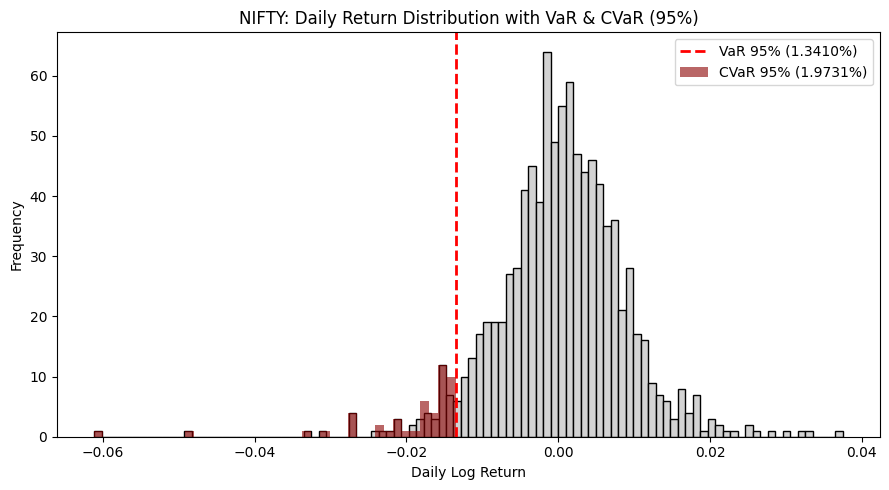

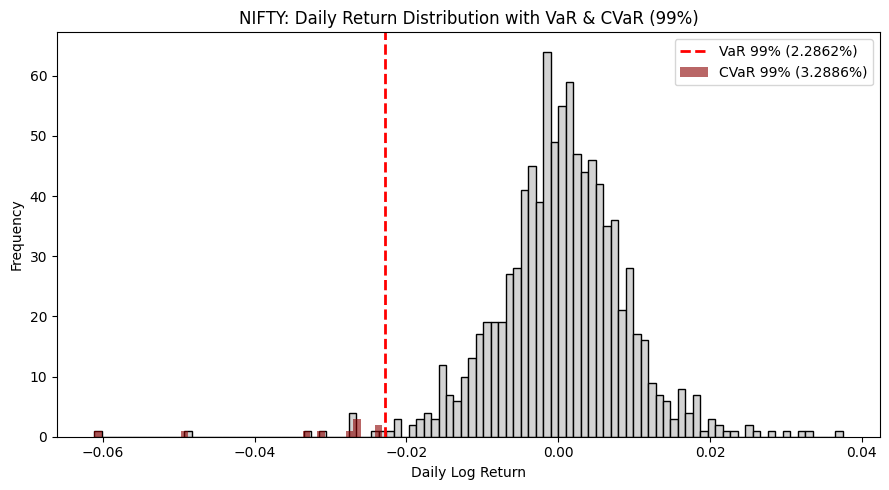

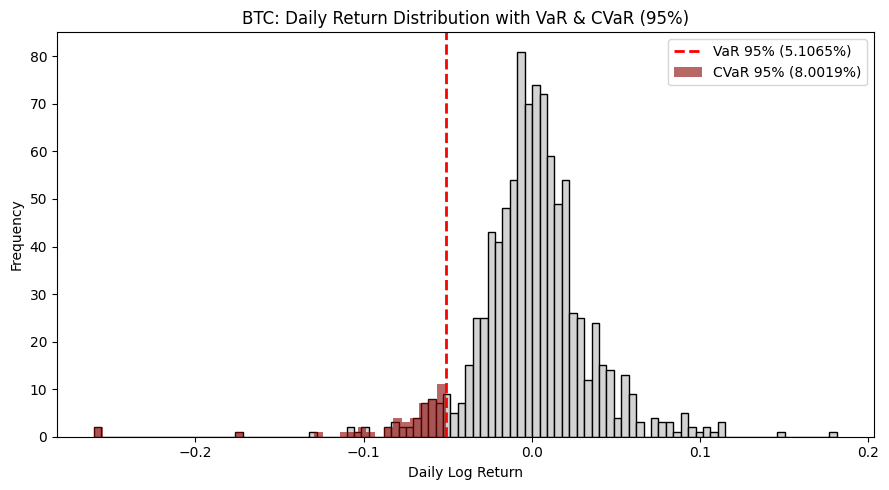

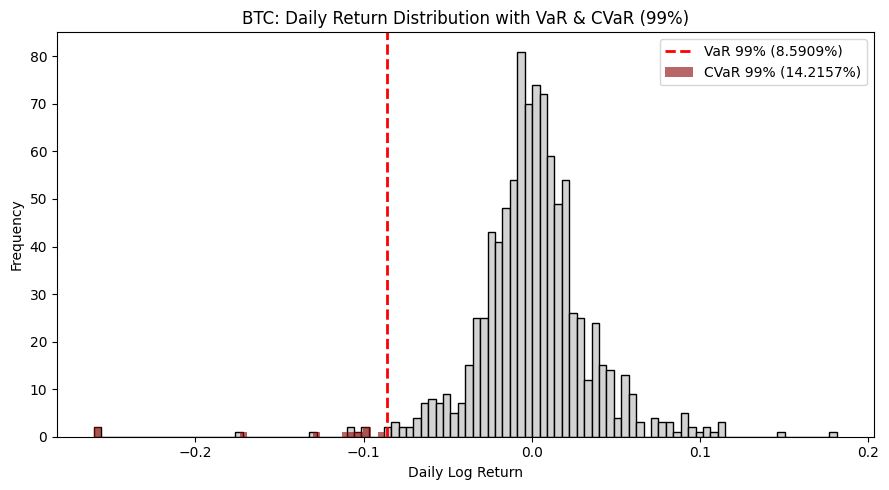

In [ ]:
# ============================================================
# ADVANCED HISTORICAL VAR–CVAR ANALYSIS
# ============================================================

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Parameters
tickers = {"NIFTY": "^NSEI", "BTC": "BTC-USD"}
start_date = "2022-01-01"
end_date = None
alpha_levels = [0.05, 0.01]   # 95% & 99%
use_log_returns = True
# ---------------------------

# --- Helper Functions ---

def download_prices(ticker, start=None, end=None):
    df = yf.download(ticker, start=start, end=end, progress=False, auto_adjust=False)
    if df.empty:
        raise RuntimeError(f"No data downloaded for {ticker}")
    return df['Adj Close']

def compute_returns(price_series, log=True):
    return np.log(price_series).diff().dropna() if log else price_series.pct_change().dropna()

def historical_var(returns, alpha):
    """Return positive VaR (loss)"""
    q = returns.quantile(alpha)
    return float(-q)

def historical_cvar(returns, alpha):
    """Return positive CVaR (average tail loss beyond VaR)"""
    q = returns.quantile(alpha)
    tail_losses = -returns[returns <= q]
    return float(tail_losses.mean())

def analyze_asset(name, price_series):
    """Compute VaR/CVaR for all alpha levels"""
    ret = compute_returns(price_series, log=use_log_returns)
    out = {"returns": ret}
    for a in alpha_levels:
        out[f"VaR_{int((1-a)*100)}%"]  = historical_var(ret, a)
        out[f"CVaR_{int((1-a)*100)}%"] = historical_cvar(ret, a)
    return out

# ============================================================
# Download & align price data
# ============================================================

print("Downloading price data...")
price_data = {name: download_prices(t, start_date, end_date) for name, t in tickers.items()}

# Align dates across all tickers (intersection)
common_index = price_data[list(price_data.keys())[0]].index
for s in list(price_data.values())[1:]:
    common_index = common_index.intersection(s.index)
price_data = {k: v.loc[common_index] for k, v in price_data.items()}
print(f"Data aligned to {len(common_index)} common dates.\n")


# ============================================================
# Analyze
# ============================================================
results = {name: analyze_asset(name, series) for name, series in price_data.items()}

# Build DataFrame
rows = []
for name, res in results.items():
    row = {"Asset": name}
    for a in alpha_levels:
        row[f"VaR_{int((1-a)*100)}%"]  = res[f"VaR_{int((1-a)*100)}%"]
        row[f"CVaR_{int((1-a)*100)}%"] = res[f"CVaR_{int((1-a)*100)}%"]
    rows.append(row)
df_risk = pd.DataFrame(rows).set_index("Asset")

# ============================================================
# INTERPRETATION SECTION
# ============================================================

print("\n=== Tail Risk Interpretation ===")
for asset in df_risk.index:
    v95, c95 = df_risk.loc[asset, ["VaR_95%", "CVaR_95%"]]
    v99, c99 = df_risk.loc[asset, ["VaR_99%", "CVaR_99%"]]
    tail_ratio_95 = c95 / v95 if v95 != 0 else np.nan
    tail_ratio_99 = c99 / v99 if v99 != 0 else np.nan

    print(f"\n🔹 {asset}")
    print(f"  - 95% VaR: {v95:.4%}, CVaR: {c95:.4%}  (Tail Severity Ratio ≈ {tail_ratio_95:.2f})")
    print(f"  - 99% VaR: {v99:.4%}, CVaR: {c99:.4%}  (Tail Severity Ratio ≈ {tail_ratio_99:.2f})")

    if tail_ratio_95 > 1.3 or tail_ratio_99 > 1.3:
        print("  → Indicates fat tails / extreme downside risk.")
    else:
        print("  → Indicates moderate tails / well-behaved downside risk.")

print("\nThe Tail Severity Ratio = CVaR / VaR. "
      "Values much above 1 suggest that when losses exceed VaR, they are far worse on average.\n")

# ============================================================
# Print Results Table
# ============================================================
print("=== Historical VaR & CVaR (daily log returns) ===\n")
print(df_risk.round(6))

# ============================================================
# Visualization
# ============================================================

# --- 1️⃣ Histogram with VaR line and CVaR tail region ---
for name, res in results.items():
    ret = res["returns"]

    if isinstance(ret, pd.DataFrame):
        ret = ret.iloc[:, 0]

    for a in alpha_levels:
        level = int((1 - a) * 100)

        # Extract scalar floats safely
        var_val = -ret.quantile(a)
        if isinstance(var_val, pd.Series):
            var_val = float(var_val.iloc[0])
        else:
            var_val = float(var_val)

        tail = ret[ret <= ret.quantile(a)]
        cvar_val = -tail.mean()
        if isinstance(cvar_val, pd.Series):
            cvar_val = float(cvar_val.iloc[0])
        else:
            cvar_val = float(cvar_val)

        plt.figure(figsize=(9, 5))
        plt.hist(ret, bins=100, color="lightgray", edgecolor="black")
        plt.axvline(
            ret.quantile(a),
            color="red",
            linestyle="--",
            lw=2,
            label=f"VaR {level}% ({var_val:.4%})"
        )

        # Highlight tail region (for CVaR)
        plt.hist(
            tail,
            bins=40,
            color="darkred",
            alpha=0.6,
            label=f"CVaR {level}% ({cvar_val:.4%})"
        )

        plt.title(f"{name}: Daily Return Distribution with VaR & CVaR ({level}%)")
        plt.xlabel("Daily Log Return")
        plt.ylabel("Frequency")
        plt.legend()
        plt.tight_layout()
        plt.show()



# 📊 Tail Risk Analysis: NIFTY vs BTC (Daily Log Returns)

## 🧮 Summary of VaR & CVaR Results

| Asset | 95% VaR | 95% CVaR | 99% VaR | 99% CVaR | Tail Severity (95%) | Tail Severity (99%) |
|:------|--------:|---------:|--------:|---------:|--------------------:|--------------------:|
| **NIFTY 50** | 1.3410 % | 1.9731 % | 2.2862 % | 3.2886 % | 1.47 × | 1.44 × |
| **Bitcoin (BTC-USD)** | 5.1065 % | 8.0019 % | 8.5909 % | 14.2157 % | 1.57 × | 1.65 × |

**Tail Severity Ratio = CVaR / VaR**  
- A ratio near 1 means the average loss beyond VaR is only slightly worse than the VaR threshold.  
- Ratios ≫ 1 indicate *fat-tailed* or highly skewed downside distributions — when losses breach VaR, they tend to be *much larger*.

---

## 🔍 Interpretation

### **NIFTY 50**
- **VaR (95%) ≈ 1.34 %** → On 5 % of trading days, losses exceed 1.34 %.  
- **CVaR (95%) ≈ 1.97 %** → When those losses occur, the *average* loss is 1.97 %.  
- **Tail Severity ≈ 1.47×** → Losses beyond VaR are roughly 47 % worse on average.  
- Similar pattern for the 99 % tail (≈ 1.44×).  
➡️ **Interpretation:** NIFTY exhibits moderate but noticeable fat tails—downside risk intensifies during extreme events, suggesting non-Gaussian return behavior.

### **Bitcoin (BTC-USD)**
- **VaR (95%) ≈ 5.11 %** and **CVaR (95%) ≈ 8.00 %**,  
- **Tail Severity ≈ 1.57× (95%)** and **1.65× (99%)**.  
➡️ **Interpretation:** Bitcoin’s tail losses are significantly larger. Its daily risk is ~4–6× that of NIFTY, and tail severity is higher — characteristic of a *heavy-tailed* and *high-volatility* asset.  
This implies that when BTC breaches its VaR threshold, losses tend to escalate sharply.

---

### 📈 Interpretation of Historical VaR & CVaR (Daily Log Returns)

| Asset | VaR (95%) | CVaR (95%) | VaR (99%) | CVaR (99%) |
|:------|-----------:|------------:|-----------:|------------:|
| **NIFTY 50** | 0.013410 | 0.019731 | 0.022862 | 0.032886 |
| **Bitcoin (BTC-USD)** | 0.051065 | 0.080019 | 0.085909 | 0.142157 |

> *All values represent **daily percentage losses** (i.e., 0.013410 = 1.3410%).*

---

### 🔹 Step-by-Step Meaning

#### **1. VaR (Value at Risk)**
- **VaR 95% (NIFTY = 1.341%)** → On 95% of trading days, daily loss is expected to be **less than or equal to 1.341%**.  
  In other words, **only 1 in 20 days** sees a loss *worse* than this.  
- **VaR 99% (NIFTY = 2.286%)** → Only **1 in 100 days** has a loss beyond 2.286%.  
- **Bitcoin’s VaR** values (5.11% and 8.59%) are **much higher**, meaning BTC experiences much larger daily swings.

#### **2. CVaR (Conditional VaR or Expected Shortfall)**
- **CVaR 95% (NIFTY = 1.973%)** → If the loss exceeds the 95% VaR (1.341%),  
  then the **average loss** on those worst 5% of days is about **1.97%**.  
- **CVaR 99% (NIFTY = 3.289%)** → Among the worst 1% of days, losses average **3.29%**.  
- **BTC’s CVaR** (8.00% and 14.22%) shows that its extreme losses are **far worse**,  
  averaging nearly **1.6× its own VaR thresholds**.

---

### 🔸 Comparative Insights

| Metric | NIFTY | BTC | Interpretation |
|:--|:--:|:--:|:--|
| **Daily Volatility** | Lower | Much higher | BTC’s returns fluctuate several times more than NIFTY’s. |
| **Tail Fatness (CVaR/VaR)** | ~1.45× | ~1.60× | BTC has fatter tails — extreme losses are disproportionately large. |
| **Systemic vs. Idiosyncratic Risk** | Market-driven | Speculative-driven | NIFTY reflects broader market dynamics; BTC reacts to global sentiment, liquidity shocks, and leverage cycles. |

---

### 💡 Key Takeaways

- **NIFTY 50**: Moderate daily losses; fat-tailed but relatively stable.  
  - Rare shocks exist but are less severe.
- **Bitcoin (BTC)**: Extremely volatile with heavy-tailed loss distribution.  
  - When losses occur beyond VaR, they tend to **escalate sharply**, reflecting extreme downside risk.
- **VaR vs CVaR gap** emphasizes why **CVaR is superior** for capturing *true tail risk*,  
  especially in non-Gaussian assets like cryptocurrencies.

---

### 📊 Interpretation Summary
| Asset | Risk Characterization | Practical Implication |
|:------|:----------------------|:----------------------|
| **NIFTY 50** | Moderate volatility, controlled tail risk | Suitable for traditional risk-managed portfolios |
| **Bitcoin (BTC)** | High volatility, severe tail losses | Requires tighter risk limits, stress testing, and position sizing |

---

## 🧩 Overall Insights

- Both assets display **non-Gaussian tails**, but **Bitcoin’s tail risk** is far more pronounced.  
- **NIFTY’s** daily losses rarely exceed ~2–3 %, while **BTC’s** can exceed ~8–14 %.  
- The **CVaR > VaR gap** highlights why relying solely on VaR can understate potential losses.  
- **Practical implication:** risk managers and traders should use CVaR for position sizing, capital allocation, and stress testing, especially in markets with known fat-tailed behavior like crypto.

---
> **In short:**  
> - VaR tells you *how bad it can get* on a typical bad day.  
> - CVaR tells you *how bad it really gets* when things go wrong.  
> - BTC’s much higher VaR and CVaR confirm it carries **significantly higher tail risk** compared to NIFTY.

---

*This interpretation complements the plotted figures — together they provide both a quantitative and visual understanding of how extreme losses behave for NIFTY vs Bitcoin.*


## 🧩 Overall Summary

- Both assets demonstrate **non-normal, heavy-tailed distributions**.  
- **NIFTY 50:** Moderate tail risk — consistent with a diversified equity index.  
- **Bitcoin:** Substantially higher volatility and tail risk — expected for a speculative asset.  
- **CVaR > VaR gap** highlights that **VaR alone can underestimate extreme losses**.  
- In practice, **CVaR provides a more reliable measure** for stress testing, portfolio risk control, and capital adequacy evaluation.

---

## 🚀 Next Steps & Extensions

1. **Rolling (time-varying) VaR/CVaR**  
   - Compute 60-day rolling estimates to observe how tail risk evolves over time.  
   - Useful for monitoring market stress periods.

2. **Parametric vs Historical CVaR**  
   - Compare empirical CVaR with model-based (Normal, t-distribution) estimates.  
   - Quantify the deviation from theoretical models.

3. **Portfolio CVaR Aggregation**  
   - Combine NIFTY & BTC with chosen weights to evaluate diversification effects on tail risk.  
   - Explore how crypto exposure impacts portfolio downside.

4. **Annualization of Risk Metrics**  
   - Convert daily VaR/CVaR to annualized terms:

  $$\text{Annualized VaR} = \text{Daily VaR} \times \sqrt{252}$$

5. **Scenario & Stress Testing**  
   - Apply the CVaR framework under simulated crisis scenarios (e.g., 2020 COVID crash).

---

### 💡 Key Takeaway
> **CVaR complements VaR** by revealing how deep the tail risk extends — it captures what happens *after* the worst-case threshold is breached.  
> Bitcoin’s larger CVaR/VaR gap underscores its asymmetric, high-risk profile, whereas NIFTY’s tail behavior is more contained but still exhibits non-normality.

---